# Assignment 2: Linear Models (Solution)
---

## Exercise 1. Linear Classification
For this exercise, you will need several packages. Let's import them using the following code.

                    import matplotlib.pyplot as plt
                    import numpy as np
                    from sklearn import datasets
                    from sklearn import decomposition
                    from sklearn.model_selection import train_test_split
                    from sklearn.linear_model import SGDClassifier

Now, please complete the following steps. 

- Load the [diabetes dataset](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_diabetes.html) and convert its labels from numerical to categorical using the average of all labels: if `label value` `<` `label value average`, set label `= 1`, else set label `= -1`.


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets
from sklearn import decomposition
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier

In [ ]:
"""
Load the diabetes dataset
"""
diabetes_X, diabetes_y = datasets.load_diabetes(return_X_y=True)

print(diabetes_X.shape)
print(diabetes_y.shape)
print(diabetes_y)

(442, 10)
(442,)
[151.  75. 141. 206. 135.  97. 138.  63. 110. 310. 101.  69. 179. 185.
 118. 171. 166. 144.  97. 168.  68.  49.  68. 245. 184. 202. 137.  85.
 131. 283. 129.  59. 341.  87.  65. 102. 265. 276. 252.  90. 100.  55.
  61.  92. 259.  53. 190. 142.  75. 142. 155. 225.  59. 104. 182. 128.
  52.  37. 170. 170.  61. 144.  52. 128.  71. 163. 150.  97. 160. 178.
  48. 270. 202. 111.  85.  42. 170. 200. 252. 113. 143.  51.  52. 210.
  65. 141.  55. 134.  42. 111.  98. 164.  48.  96.  90. 162. 150. 279.
  92.  83. 128. 102. 302. 198.  95.  53. 134. 144. 232.  81. 104.  59.
 246. 297. 258. 229. 275. 281. 179. 200. 200. 173. 180.  84. 121. 161.
  99. 109. 115. 268. 274. 158. 107.  83. 103. 272.  85. 280. 336. 281.
 118. 317. 235.  60. 174. 259. 178. 128.  96. 126. 288.  88. 292.  71.
 197. 186.  25.  84.  96. 195.  53. 217. 172. 131. 214.  59.  70. 220.
 268. 152.  47.  74. 295. 101. 151. 127. 237. 225.  81. 151. 107.  64.
 138. 185. 265. 101. 137. 143. 141.  79. 292. 178.  91. 116.

In [ ]:
"""
convert numerical labels to categorical labels
"""
y_mean = np.mean(diabetes_y)  # 152.13
print(y_mean)

y_binary = np.array([1 if i > y_mean else -1 for i in diabetes_y])

print(diabetes_y)
print(y_binary)

152.13348416289594
[151.  75. 141. 206. 135.  97. 138.  63. 110. 310. 101.  69. 179. 185.
 118. 171. 166. 144.  97. 168.  68.  49.  68. 245. 184. 202. 137.  85.
 131. 283. 129.  59. 341.  87.  65. 102. 265. 276. 252.  90. 100.  55.
  61.  92. 259.  53. 190. 142.  75. 142. 155. 225.  59. 104. 182. 128.
  52.  37. 170. 170.  61. 144.  52. 128.  71. 163. 150.  97. 160. 178.
  48. 270. 202. 111.  85.  42. 170. 200. 252. 113. 143.  51.  52. 210.
  65. 141.  55. 134.  42. 111.  98. 164.  48.  96.  90. 162. 150. 279.
  92.  83. 128. 102. 302. 198.  95.  53. 134. 144. 232.  81. 104.  59.
 246. 297. 258. 229. 275. 281. 179. 200. 200. 173. 180.  84. 121. 161.
  99. 109. 115. 268. 274. 158. 107.  83. 103. 272.  85. 280. 336. 281.
 118. 317. 235.  60. 174. 259. 178. 128.  96. 126. 288.  88. 292.  71.
 197. 186.  25.  84.  96. 195.  53. 217. 172. 131. 214.  59.  70. 220.
 268. 152.  47.  74. 295. 101. 151. 127. 237. 225.  81. 151. 107.  64.
 138. 185. 265. 101. 137. 143. 141.  79. 292. 178.  91. 11



- Perform the 6:2:2 split of the dataset (training set, validation set, test set). Store the training set in `X_train` and `y_train`. Tip: you may find `train_test_split` ([link](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)) useful. 

In [ ]:
"""
partition data into training set, validation set, and test set
"""
# Split train to 60% and temp to 40%
X_train, X_temp, y_train, y_temp = train_test_split(diabetes_X, y_binary, test_size=0.4, shuffle=True, random_state=42)

# Split temp further 50% to test and 50% to validation. We end up with 60% train, 20% val and 20% test
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, shuffle=True, random_state=42)


print(X_train.shape)
print(X_val.shape)
print(X_test.shape)
print(y_train.shape)
print(y_val.shape)
print(y_test.shape)

(265, 10)
(88, 10)
(89, 10)
(265,)
(88,)
(89,)



- Train a linear classifier on the dataset using the built-in functions provided by `sklearn` as follows.


                    from sklearn.linear_model import SGDClassifier
                    clf = SGDClassifier(random_state=42)
                    clf.fit(X_train, y_train)


- The coefficients $\theta$ and intercept $\theta_0$ can be accessed as `clf.coef_` and `clf.intercept_`, respectively. Please check the dimensions of `clf.coef_` and `clf.intercept_`.


In [ ]:
"""
train a linear classifier
"""
clf = SGDClassifier(random_state=42)
clf.fit(X_train, y_train)

coef = clf.coef_
intercept = clf.intercept_

print(coef.shape)
print(intercept.shape)

(1, 10)
(1,)



Next, let's implement two utility functions below. You may want to take a look at matrix-multiplications using numpy ([link](https://numpy.org/doc/stable/reference/generated/numpy.matmul.html)).

                    def compute_prediction(X, coef, intercept):
                      # Returns predictions as a 1-D array
                      ##### YOUR CODE HERE #####
                      return result

                    def compute_accuracy(pred, actual):
                      # Returns the prediction accuracy in percentage
                        ##### YOUR CODE HERE #####
                        return accuracy

In [ ]:
"""
utility functions
"""
def compute_prediction(X, coef, intercept):
    # compute the numeric values as the result of the prediction
    result = np.matmul(X, coef.T) + intercept

    # make the prediction results binary according to the decision boundary
    result[result > 0] = 1
    result[result <= 0] = -1

    # make the result 1d array
    result = result.reshape(-1)
    return result


def compute_accuracy(pred, actual):
    agreement = (pred == actual)
    accuracy = np.sum(agreement) / pred.shape[0]
    return accuracy

- Use `compute_prediction` that you just wrote to obtain predictions on the training set, validation set, and test set, respectively. Check the shapes of the predictions.

                    # Compute predictions manually
                    pred_train = compute_prediction(X_train, coef, intercept)
                    pred_val = compute_prediction(X_val, coef, intercept)
                    pred_test = compute_prediction(X_test, coef, intercept)

                    print(pred_train.shape, pred_val.shape, pred_test.shape)
                    



In [ ]:
# Compute predictions manually
pred_train = compute_prediction(X_train, coef, intercept)
pred_val = compute_prediction(X_val, coef, intercept)
pred_test = compute_prediction(X_test, coef, intercept)

print(pred_train.shape, pred_val.shape, pred_test.shape)

(265,) (88,) (89,)


- Use `compute_accuracy` that you just wrote to obtain accuracies on the predictions made on the training set, validation set, and test set, respectively. 

                    # Accuracies on predictions
                    acc_train = compute_accuracy(pred_train,y_train)
                    acc_val = compute_accuracy(pred_val,y_val)
                    acc_test = compute_accuracy(pred_test,y_test)

                    print(f"Accuracies from the functions we wrote:\n {acc_train}, {acc_val}, {acc_test}")



In [ ]:
# Accuracies on predictions made
acc_train = compute_accuracy(pred_train,y_train)
acc_val = compute_accuracy(pred_val,y_val)
acc_test = compute_accuracy(pred_test,y_test)

print(f"Accuracies from the functions we wrote:\n {acc_train}, {acc_val}, {acc_test}")

Accuracies from the functions we wrote:
 0.7622641509433963, 0.7840909090909091, 0.7303370786516854


- For the training set, validation set, and test set, use the built-in functions `clf.predict()` and `clf.score()` of the classifier to make predictions and obtain accuracies. Are the results the same?

                    # Scores (accuracy be default) on the predictions
                    acc_train_clf = clf.score(X_train,y_train)
                    acc_val_clf = clf.score(X_val,y_val)
                    acc_test_clf = clf.score(X_test,y_test)

                    print(f"Accuracies from the built in function:\n {acc_train_clf}, {acc_val_clf}, {acc_test_clf}")

In [ ]:
"""
compute and accuracy using built in function
"""

# Scores (accuracy be default) on the predictions
acc_train_clf = clf.score(X_train,y_train)
acc_val_clf = clf.score(X_val,y_val)
acc_test_clf = clf.score(X_test,y_test)

print(f"Accuracies from the built in function:\n {acc_train_clf}, {acc_val_clf}, {acc_test_clf}")

Accuracies from the built in function:
 0.7622641509433963, 0.7840909090909091, 0.7303370786516854


---
## Exercise 2. Linear Regression
For this exercise, we are going to write a gradient-based method to solve a linear regression task. 


First, let's import the necessary packages. 

                    from sklearn.datasets import make_regression
                    import matplotlib.pyplot as plt

Use the following code to generate and inspect the data.

                    X, y = make_regression(n_samples=100, n_features=1, noise=10, random_state=42)

                    fig, ax = plt.subplots(figsize = (10,6), dpi = 80)
                    ax.set_xlabel('X')
                    ax.set_ylabel('y')
                    ax.scatter(X,y,label="training data")
                    ax.legend()

In [ ]:
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt

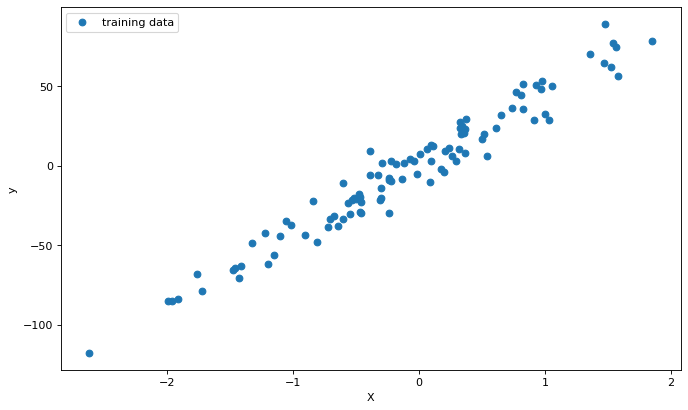

In [ ]:
""" 
generate a dataset
"""

X, y = make_regression(n_samples=100, n_features=1, noise=10, random_state=42)

fig, ax = plt.subplots(figsize = (10,6), dpi = 80)
ax.set_xlabel('X')
ax.set_ylabel('y')
ax.scatter(X,y,label="training data")
ax.legend()


Next, please implement the following two functions. The pseudocode is shown below.

![pseudo](https://user-images.githubusercontent.com/96804013/152409472-fe7a981f-eec9-471e-b684-bc028dd4c872.png)


                    def gradient_descent(X, y, init_slope, init_intercept, learning_rate, num_iter)
                      # The main gradient descent function
                      ##### YOUR CODE HERE ####
                      return new_slope, new_intercept

                    def gradient_one_step(X, y, slope, intercept, learning_rate):
                      # Function for taking one gradient step
                      ##### YOUR CODE HERE ####
                      return slope, intercept




In [ ]:
""" 
function to perform gradient descent for one step
"""
def gradient_one_step(X, y, slope, intercept, learning_rate):
    slope_gradient = 0
    intercept_gradient = 0
    N = len(y)

    for i in range(N):
        # Take a step in the direction of the gradient 
        slope_gradient += -(1 / N) * X[i] * (y[i] - (slope * X[i] + intercept))
        intercept_gradient += -(1 / N) * (y[i] - (slope * X[i] + intercept))

    new_slope = slope - (learning_rate * slope_gradient)
    new_intercept = intercept - (learning_rate * intercept_gradient)

    return new_slope, new_intercept

In [ ]:
""" 
function to implement the gradient descent algorithm
"""
def gradient_descent(X, y, init_slope, init_intercept, learning_rate, num_iter):
	slope = init_slope
	intercept = init_intercept

	for i in range(num_iter):
		slope, intercept = gradient_one_step(X, y, slope, intercept, learning_rate)
	
	return slope, intercept


The other parameters of the learning procedure can be set as follows.

                    learning_rate = 0.01 # Learning rate
                    init_slope = 0 # Initial slope
                    init_intercept = 0 # Initial intercept
                    num_iter = 1000 # Number of iterations

Finally, using the learnt slope and intercept, you can plot the trained/learnt linear model (i.e., the fitted line) using the following code. 

                    slope, intercept = gradient_descent(X, y, init_slope, init_intercept, learning_rate, num_iter)

                    ### Plot the data
                    fig, ax = plt.subplots(figsize=(10,6), dpi = 80)
                    ax.scatter(X,y,label="training data")
                    ax.set_xlabel('X')
                    ax.set_ylabel('y')

                    ### Plot the learnt linear model
                    ax.plot(X, slope*X + intercept, color="red", label="fitted line")
                    ax.legend()



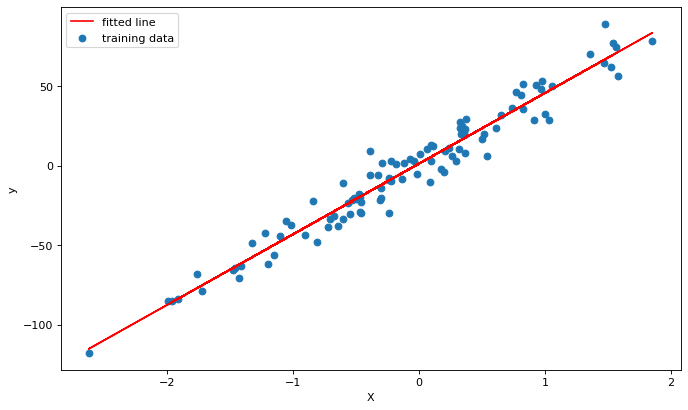

In [ ]:
""" 
set initial parameters
"""
learning_rate = 0.01
init_slope = 0
init_intercept = 0
num_iter = 1000

""" 
run the gradient descent algorithm and check the results
"""
slope, intercept = gradient_descent(X, y, init_slope, init_intercept, learning_rate, num_iter)

### Plot the generated data again
fig, ax = plt.subplots(figsize=(10,6), dpi = 80)
ax.scatter(X,y,label="training data")
ax.set_xlabel('X')
ax.set_ylabel('y')

### Plot the model learned to see how well it fit the data
ax.plot(X, slope*X + intercept, color="red", label="fitted line")
ax.legend()